# Análisis EDA de productores autorizados 2023

# 1. Importación de librerías y carga de datos

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)

In [3]:
lista_productores = pd.read_csv('../../data/listado_productores_complete.csv')

In [4]:
lista_productores.shape

(1525720, 11)

# 2. Análisis Inicial

## 2.1 Estructura de los datos

In [5]:
lista_productores.head()

,ESTADO,MUNICIPIO,NOM_MUN,NOM_ENT,CVE_ENT,CVE_MUN,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
0,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2
1,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2
2,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2
3,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2
4,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2


In [6]:
lista_productores.tail()

,ESTADO,MUNICIPIO,NOM_MUN,NOM_ENT,CVE_ENT,CVE_MUN,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE
1525715,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2
1525716,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2
1525717,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2
1525718,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2
1525719,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103374-S000-PL,NaN,NaN,NaN,2


## 2.2 Información general

In [7]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525720 entries, 0 to 1525719
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ESTADO            1525720 non-null  object 
 1   MUNICIPIO         1450208 non-null  object 
 2   NOM_MUN           1412445 non-null  object 
 3   NOM_ENT           1412445 non-null  object 
 4   CVE_ENT           1412445 non-null  float64
 5   CVE_MUN           1412445 non-null  float64
 6   ACUSE             1525720 non-null  object 
 7   APELLIDO PATERNO  1521426 non-null  object 
 8   APELLIDO MATERNO  1497507 non-null  object 
 9   NOMBRE (S)        1521427 non-null  object 
 10  PAQUETE           1525720 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 128.0+ MB


## 2.3 Estadísticas Descriptivas

In [8]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = lista_productores.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                      count   unique                             top    freq  \
ESTADO              1525720       20                        GUERRERO  356223   
MUNICIPIO           1450208     1694                  LAS MARGARITAS   19497   
NOM_MUN             1412445     1662                  Las Margaritas   19497   
NOM_ENT             1412445       17                        Guerrero  354841   
CVE_ENT           1412445.0      NaN                             NaN     NaN   
CVE_MUN           1412445.0      NaN                             NaN     NaN   
ACUSE               1525720  1525720  23-PRONAFE-FERT-000510-S000-AS       1   
APELLIDO PATERNO    1521426    13551                       HERNANDEZ   75301   
APELLIDO MATERNO    1497507    15970                       HERNANDEZ   75248   
NOMBRE (S)          1521427   116715                            JUAN   24614   
PAQUETE           1525720.0      NaN                             NaN     NaN   

                       mean         std

# 3. Limpieza de Datos

## 3.1 Valores Nulos

In [9]:
valores_nulos = lista_productores.isna().sum()
print(valores_nulos)

ESTADO                   0
MUNICIPIO            75512
NOM_MUN             113275
NOM_ENT             113275
CVE_ENT             113275
CVE_MUN             113275
ACUSE                    0
APELLIDO PATERNO      4294
APELLIDO MATERNO     28213
NOMBRE (S)            4293
PAQUETE                  0
dtype: int64


## 3.2 Decisiones sobre valores nulos

In [10]:
# Los nombres y apellidos paternos y maternos que están vacíos y tengan número de acuse se reemplazarán por 'unknown'
lista_productores.loc[(lista_productores['APELLIDO PATERNO'].isna()) & (
    lista_productores['ACUSE'].notna()), 'APELLIDO PATERNO'] = 'unknown'
lista_productores.loc[(lista_productores['APELLIDO MATERNO'].isna()) & (
    lista_productores['ACUSE'].notna()), 'APELLIDO MATERNO'] = 'unknown'
lista_productores.loc[
    (lista_productores['NOMBRE (S)'].isna()) & (lista_productores['ACUSE'].notna()), 'NOMBRE (S)'] = 'unknown'

In [11]:
duplicated_rows_productores = lista_productores['ACUSE'].duplicated()
number_of_duplicated_rows_productores = duplicated_rows_productores.sum()
print(f"El número de filas duplicadas es: {number_of_duplicated_rows_productores}")

El número de filas duplicadas es: 0


## 3.3 Valores Duplicados

In [12]:
filas_duplicadas = lista_productores.duplicated().sum()
print(f'Hay {filas_duplicadas} valores duplicados')

Hay 0 valores duplicados


In [13]:
for column in lista_productores.columns:
    duplicated_rows = lista_productores[column].duplicated()
    number_of_duplicated_rows = duplicated_rows.sum()
    print(f"El número de filas duplicadas en la columna {column} es: {number_of_duplicated_rows}")

El número de filas duplicadas en la columna ESTADO es: 1525700
El número de filas duplicadas en la columna MUNICIPIO es: 1524025
El número de filas duplicadas en la columna NOM_MUN es: 1524057
El número de filas duplicadas en la columna NOM_ENT es: 1525702
El número de filas duplicadas en la columna CVE_ENT es: 1525702
El número de filas duplicadas en la columna CVE_MUN es: 1525157
El número de filas duplicadas en la columna ACUSE es: 0
El número de filas duplicadas en la columna APELLIDO PATERNO es: 1512168
El número de filas duplicadas en la columna APELLIDO MATERNO es: 1509749
El número de filas duplicadas en la columna NOMBRE (S) es: 1409004
El número de filas duplicadas en la columna PAQUETE es: 1525718


## 3.4 Decisiones sobre valores duplicados

## 3.5 Corrección de Tipos de Datos

In [14]:
lista_productores = lista_productores.astype({
    'ESTADO': 'str',
    'MUNICIPIO': 'str',
    'ACUSE': 'str',
    'APELLIDO PATERNO': 'str',
    'APELLIDO MATERNO': 'str',
    'NOMBRE (S)': 'str',
    'PAQUETE': 'int',
    'NOM_MUN': 'str',
    'NOM_ENT': 'str',
    'CVE_MUN': 'str',
    'CVE_ENT': 'str'
})

In [15]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525720 entries, 0 to 1525719
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ESTADO            1525720 non-null  object
 1   MUNICIPIO         1525720 non-null  object
 2   NOM_MUN           1525720 non-null  object
 3   NOM_ENT           1525720 non-null  object
 4   CVE_ENT           1525720 non-null  object
 5   CVE_MUN           1525720 non-null  object
 6   ACUSE             1525720 non-null  object
 7   APELLIDO PATERNO  1525720 non-null  object
 8   APELLIDO MATERNO  1525720 non-null  object
 9   NOMBRE (S)        1525720 non-null  object
 10  PAQUETE           1525720 non-null  int32 
dtypes: int32(1), object(10)
memory usage: 122.2+ MB


# 4. Análisis Univariado

## 4.1 Variables Numéricas

En este caso, la única variable númerica es la de paquetes.

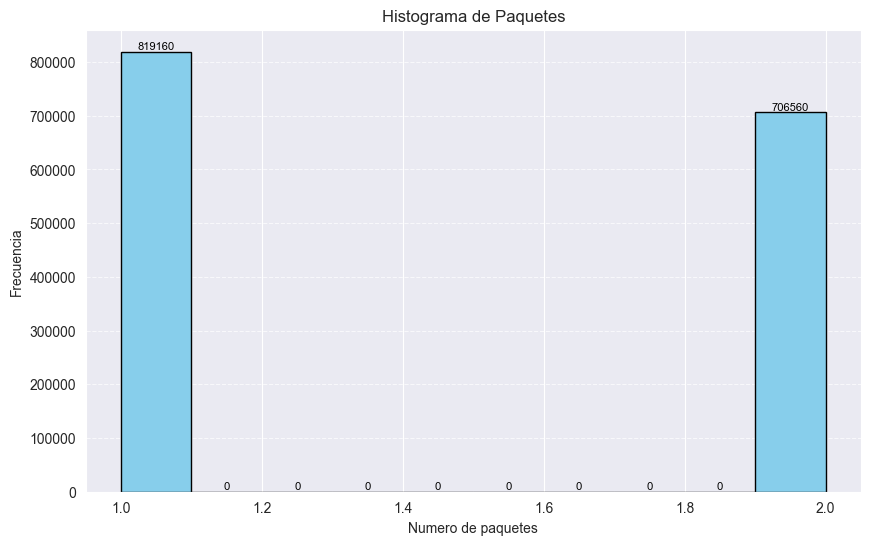

In [16]:
# Filtrar los datos para estar dentro del rango de interés
paquetes = lista_productores['PAQUETE']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(10, 6))
barras = plt.hist(paquetes, color='skyblue', edgecolor='black')
plt.xlabel('Numero de paquetes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Paquetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Recorrer las barras
for i in range(len(barras[0])):
    # Obtener el valor de la barra
    valor = barras[0][i]

     # Calcular la posición x de la anotación como el centro de la barra
    bar_width = barras[1][1] - barras[1][0]  # Ancho de las barras
    x_pos = barras[1][i] + bar_width / 2  # Posición x del centro de la barra

    # Mostrar el valor encima de la barra
    plt.annotate(f"{valor:.0f}", xy=(x_pos, valor),
                 ha="center", va="bottom", fontsize=8, color="black")

plt.show()

In [ ]:
# TODO Ver cantidad en una etiqueta

## 4.2 Variables Categóricas

In [ ]:
paquetes = lista_productores['ESTADO_prod']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(30, 4))
plt.hist(paquetes, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Paquetes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
x = lista_productores[['ESTADO_prod', 'MUNICIPIO_prod', 'ACUSE']]

In [ ]:
grouped_df = lista_productores.groupby("ESTADO_prod")["MUNICIPIO_inegi"].count().reset_index()

In [ ]:
grouped_df